### Transformata Hougha w przestrzeni ab - Domowe
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak na prawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_)
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

In [16]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os
import requests

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/'

fileNames = ["dom.png", "kwadraty.png", "lab112.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

In [17]:
def hough_ab(img, aMin, aMax, aSkok, bMin, bMax, bSkok):
    a = np.arange(aMin, aMax, aSkok)
    b = np.arange(bMin, bMax, bSkok)

    H = np.zeros((len(a), len(b)))
    height, width = img.shape

    for i in range(height):
        for j in range(width):
            if img[i][j]:
                for x in range(len(a)):
                    y = np.argmin(abs(b - (i - a[x] * j)))
                    H[x, y] += 1
    return H

In [18]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('B values')
    ax[1].set_ylabel('A values')
    ax[1].axis('image')

    plt.tight_layout()
    plt.show()

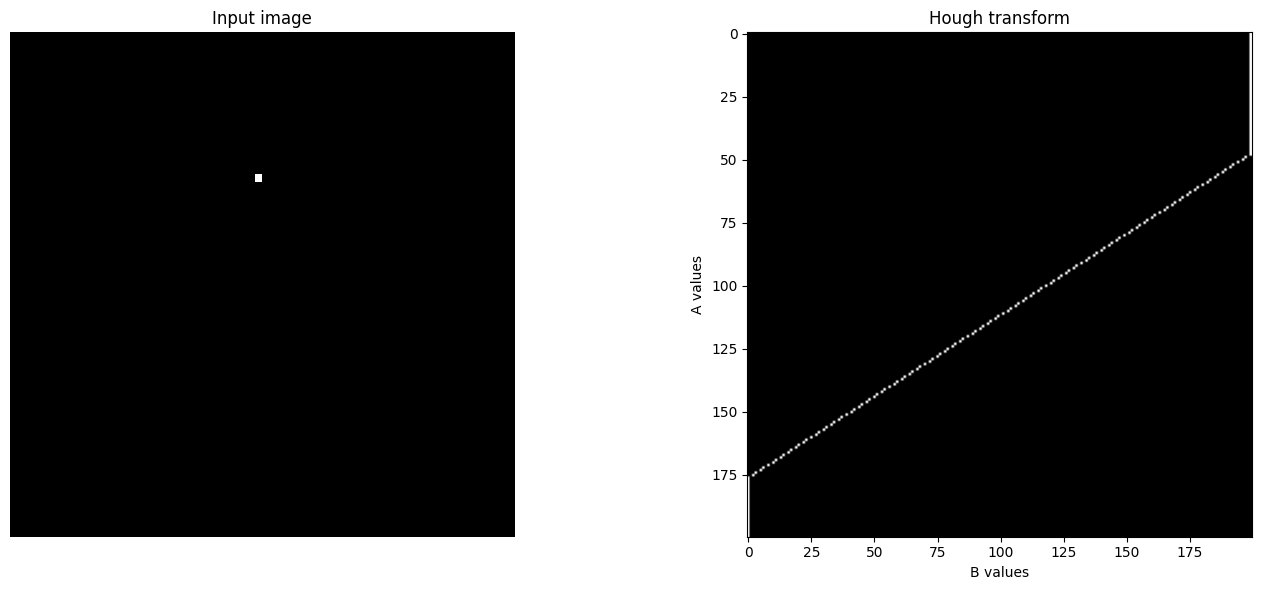

In [19]:
img = np.zeros((64,64), dtype=np.uint8)
img[18, 31] = 1

show_hough(hough_ab(img, -5, 5, 0.05, -100, 100, 1), img)

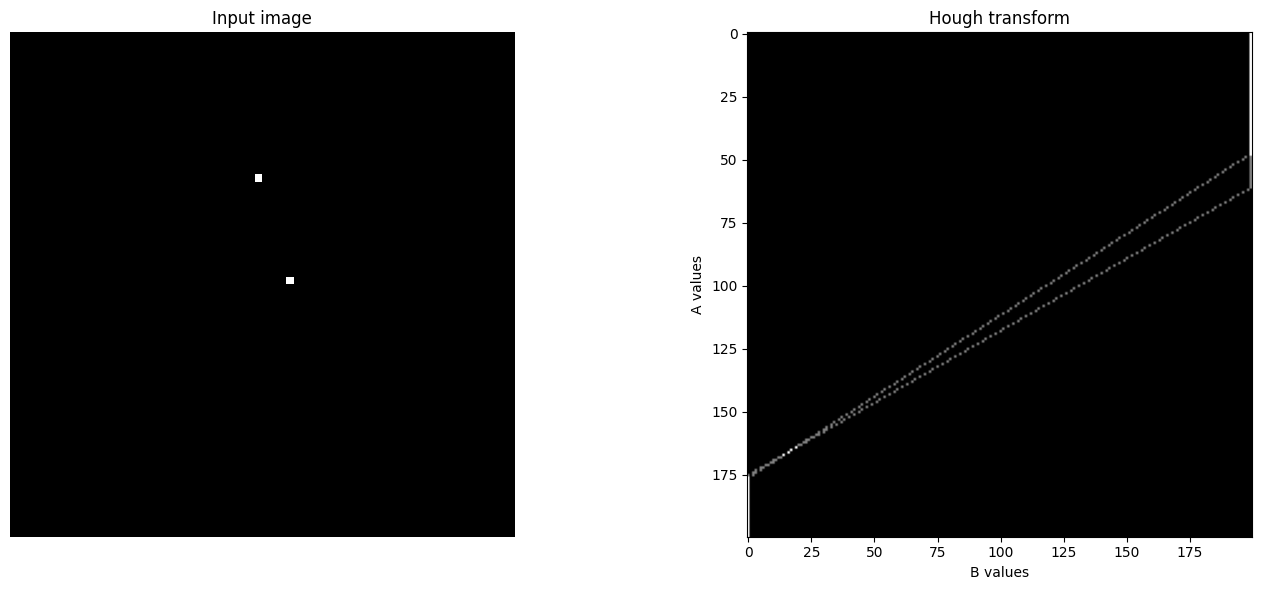

In [20]:
img = np.zeros((64, 64), dtype=np.uint8)
img[18, 31] = 1
img[31, 35] = 1

show_hough(hough_ab(img, -5, 5, 0.05, -100, 100, 1), img)

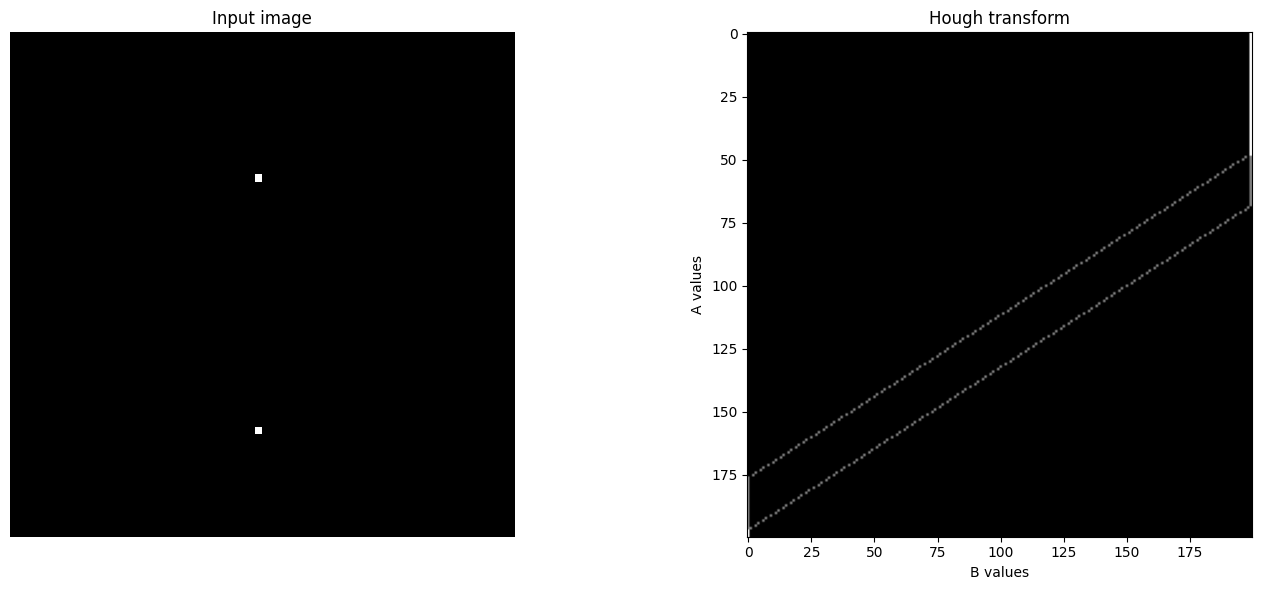

In [21]:
img = np.zeros((64, 64), dtype=np.uint8)
img[18, 31] = 1
img[50, 31] = 1

show_hough(hough_ab(img, -5, 5, 0.05, -100, 100, 1), img)

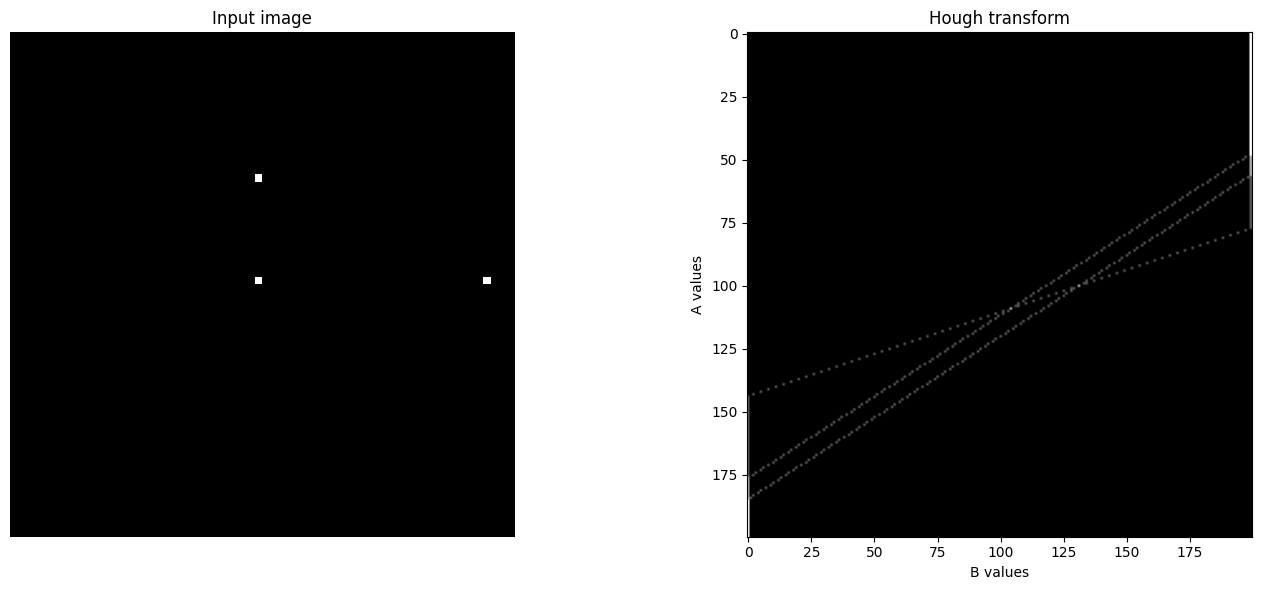

In [22]:
img = np.zeros((64, 64), dtype=np.uint8)
img[18, 31] = 1
img[31, 31] = 1
img[31, 60] = 1

show_hough(hough_ab(img, -5, 5, 0.05, -100, 100, 1), img)

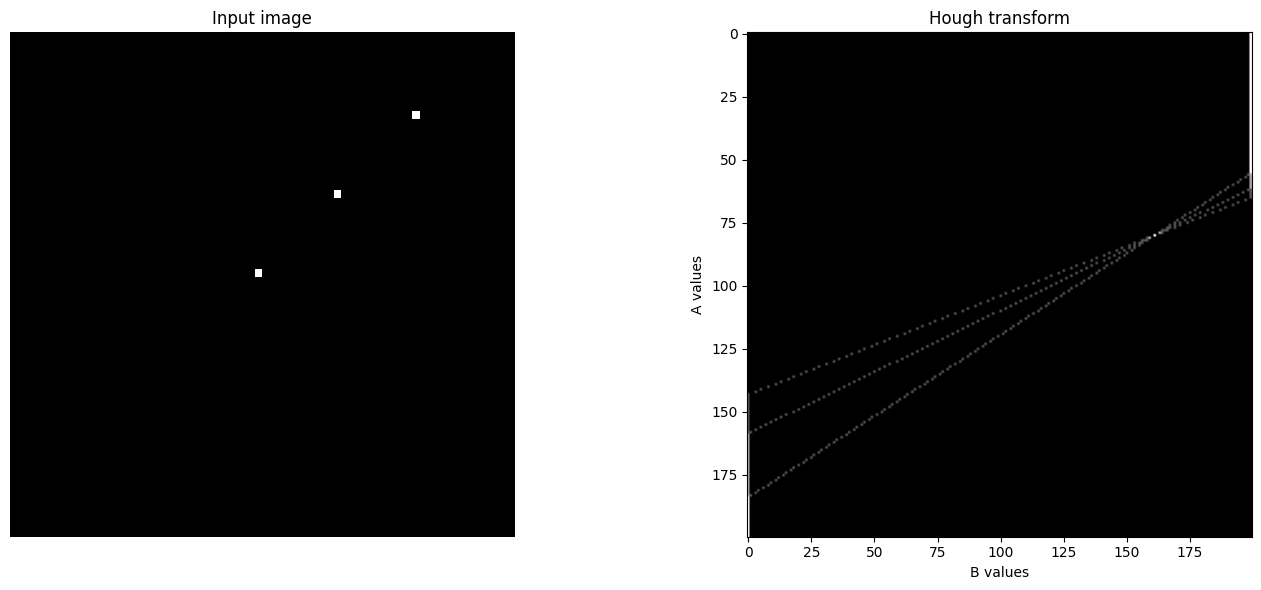

In [23]:
img = np.zeros((64, 64), dtype=np.uint8)
img[10, 51] = 1
img[20, 41] = 1
img[30, 31] = 1

show_hough(hough_ab(img, -5, 5, 0.05, -100, 100, 1), img)